In [59]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
data_train = pd.read_csv('/content/drive/MyDrive/DUK/Internship/fraudTrain.csv', header = 0)
data_test = pd.read_csv('/content/drive/MyDrive/DUK/Internship/fraudTest.csv', header = 0)

In [62]:
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [63]:
data_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [64]:
data_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
720774,720774,2019-11-03 21:31:50,630451534402,fraud_Waters-Cruickshank,health_fitness,37.99,Rachel,Daniels,F,561 Little Plain Apt. 738,...,46.3535,-86.6345,765.0,Immunologist,1972-06-12,8fcfbd8973f83b9c21aac1e08214cb64,1.351978e+09,46.553289,-86.421538,0.0
720775,720775,2019-11-03 21:32:12,4229733778084049,fraud_Upton PLC,entertainment,15.75,Tyler,Mills,M,7838 Jason Squares,...,37.6848,-85.8784,48194.0,Surgeon,1990-05-03,ff637f5b41918c6bee54fd9a3149052b,1.351978e+09,37.109477,-85.625389,0.0
720776,720776,2019-11-03 21:32:22,4998109455173950,fraud_Conroy Ltd,shopping_pos,1650.57,Mary,Pruitt,F,2819 Luke Greens Suite 563,...,38.9621,-94.5959,545147.0,Counsellor,1987-11-18,129ffd239e1460c3a4c78613b7a71dce,1.351978e+09,38.272118,-94.605166,0.0
720777,720777,2019-11-03 21:32:59,376445266762684,fraud_Howe Ltd,misc_pos,23.86,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789.0,Insurance broker,1982-02-11,ee9c81cb47c0e1a30521ff8f7af9a432,1.351978e+09,40.932838,-100.871667,0.0
720778,720778,2019-11-03 21:33:01,6011652924285713,fraud_Beier-Hyatt,shopping_pos,7.60,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data_train.shape

(720779, 23)

In [66]:
data_test.shape

(555719, 23)

In [67]:
data_train.size

16577917

In [68]:
data_test.size

12781537

In [69]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720779 entries, 0 to 720778
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             720779 non-null  int64  
 1   trans_date_trans_time  720779 non-null  object 
 2   cc_num                 720779 non-null  int64  
 3   merchant               720779 non-null  object 
 4   category               720779 non-null  object 
 5   amt                    720779 non-null  float64
 6   first                  720779 non-null  object 
 7   last                   720779 non-null  object 
 8   gender                 720779 non-null  object 
 9   street                 720779 non-null  object 
 10  city                   720778 non-null  object 
 11  state                  720778 non-null  object 
 12  zip                    720778 non-null  float64
 13  lat                    720778 non-null  float64
 14  long                   720778 non-nu

In [70]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [71]:
data_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,720779.000000,7.207790e+05,720779.000000,720778.000000,720778.000000,720778.000000,7.207780e+05,7.207780e+05,720778.000000,720778.000000,720778.000000
mean,360389.000000,4.165124e+17,70.285860,48781.317625,38.537168,-90.217942,8.909939e+04,1.339467e+09,38.536923,-90.218443,0.005970
std,208071.119176,1.307975e+18,158.297115,26903.021275,5.073165,13.760990,3.028964e+05,7.256754e+06,5.107406,13.772968,0.077034
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,180194.500000,1.800365e+14,9.650000,26237.000000,34.668900,-96.798000,7.430000e+02,1.333537e+09,34.740161,-96.891508,0.000000
50%,360389.000000,3.520550e+15,47.400000,48174.000000,39.354300,-87.461600,2.456000e+03,1.339884e+09,39.366868,-87.426497,0.000000
75%,540583.500000,4.642255e+15,83.070000,72011.000000,41.894800,-80.158000,2.047800e+04,1.345391e+09,41.955343,-80.218962,0.000000
max,720778.000000,4.992346e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.351978e+09,67.510267,-66.956540,1.000000


In [72]:
data_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [73]:
data_train.isnull().values.any()

True

In [74]:
data_test.isnull().values.any()

False

In [75]:
data_train.count()

,0
Unnamed: 0,720779
trans_date_trans_time,720779
cc_num,720779
merchant,720779
category,720779
amt,720779
first,720779
last,720779
gender,720779
street,720779


In [76]:
data_test.count()

,0
Unnamed: 0,555719
trans_date_trans_time,555719
cc_num,555719
merchant,555719
category,555719
amt,555719
first,555719
last,555719
gender,555719
street,555719


In [77]:
data_merged = pd.concat([data_train, data_test], axis = 0)

In [78]:
data_merged.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [79]:
data_merged.shape

(1276498, 23)

In [80]:
data_merged.size

29359454

In [81]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276498 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1276498 non-null  int64  
 1   trans_date_trans_time  1276498 non-null  object 
 2   cc_num                 1276498 non-null  int64  
 3   merchant               1276498 non-null  object 
 4   category               1276498 non-null  object 
 5   amt                    1276498 non-null  float64
 6   first                  1276498 non-null  object 
 7   last                   1276498 non-null  object 
 8   gender                 1276498 non-null  object 
 9   street                 1276498 non-null  object 
 10  city                   1276497 non-null  object 
 11  state                  1276497 non-null  object 
 12  zip                    1276497 non-null  float64
 13  lat                    1276497 non-null  float64
 14  long                   1

In [82]:
data_merged.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time","city","state"], axis = 1, inplace = True)

In [83]:
data_merged.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0


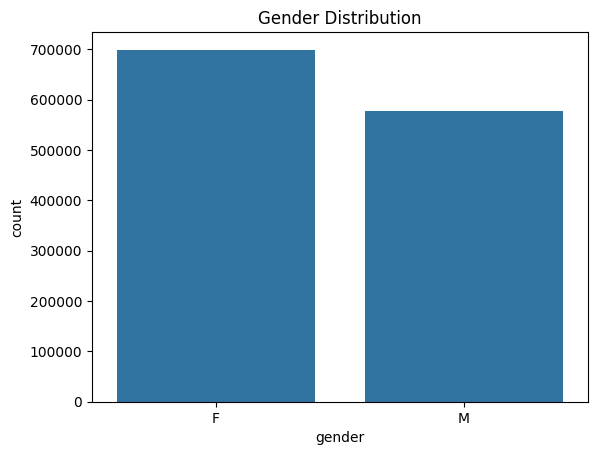

In [84]:
sns.countplot(x='gender', data=data_merged)
plt.title("Gender Distribution")
plt.show()

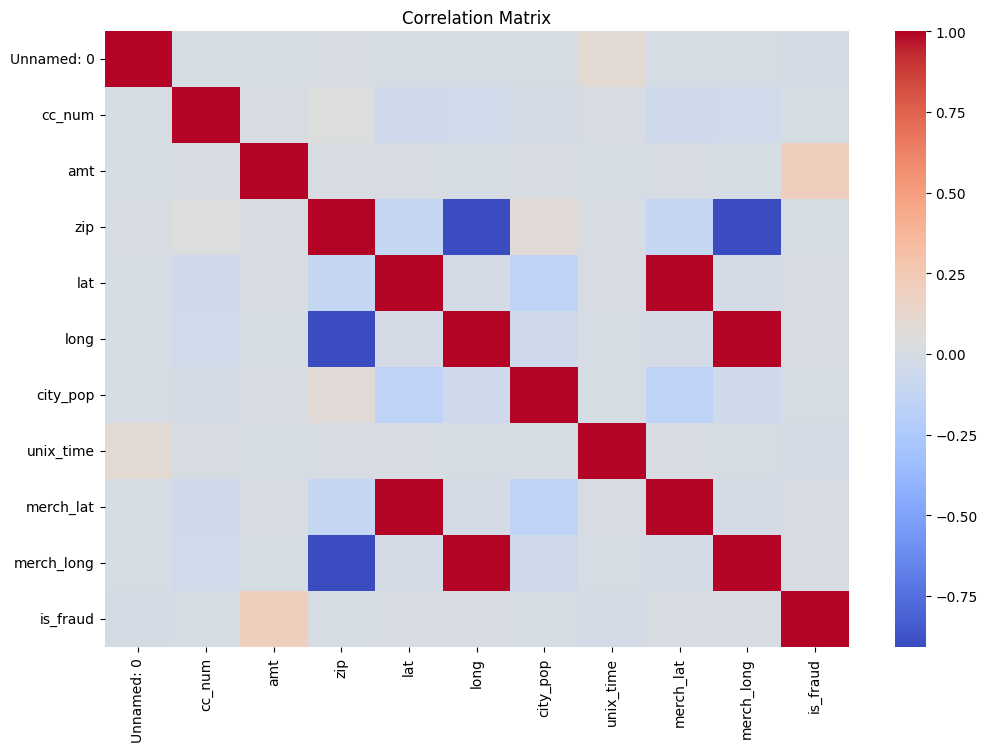

In [85]:
numeric_data = data_merged.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [86]:
encoder = LabelEncoder()
new_coln = encoder.fit_transform(data_merged["merchant"].values)
data_merged["merchant_new"] = new_coln
data_merged.drop(labels = ["merchant"], axis = 1, inplace = True)

In [87]:
encoder = LabelEncoder()
new_coln1 = encoder.fit_transform(data_merged["category"].values)
data_merged["category_new"] = new_coln1
data_merged.drop(labels = ["category"], axis = 1, inplace = True)

In [88]:
data_merged = pd.get_dummies(data_merged)
data_merged.drop(labels=['gender_F'], axis = 1, inplace = True)

In [89]:
data_merged.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2703186189652095,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,514,8,False
1,1,630423337322,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,241,4,False
2,2,38859492057661,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,390,0,True
3,3,3534093764340240,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,360,2,True
4,4,375534208663984,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,297,9,True


In [90]:
X = data_merged.drop("is_fraud", axis = 1)
y = data_merged["is_fraud"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
log_reg_model = LogisticRegression()

In [93]:
merged_data = pd.concat([X_train, y_train], axis=1)
merged_data_drop= merged_data.dropna()
X_train_drop = merged_data_drop.iloc[:, :-1]
y_train_drop = merged_data_drop.iloc[:, -1]   # Only the last column

# Fit the Logistic Regression model with the cleaned data
log_reg_model.fit(X_train_drop, y_train_drop)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
log_reg_predictions = log_reg_model.predict(X_test)

In [95]:
print("Logistic Regression Model is: ")
print(confusion_matrix(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))
print("Accuracy is: ", accuracy_score(y_test, lr_predictions))

Logistic Regression Model is: 
[[254054      0]
 [  1246      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    254054
         1.0       0.00      0.00      0.00      1246

    accuracy                           1.00    255300
   macro avg       0.50      0.50      0.50    255300
weighted avg       0.99      1.00      0.99    255300

Accuracy is:  0.9951194672933803


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
dec_tree_model = DecisionTreeClassifier()

In [97]:
dec_tree_model.fit(X_train_drop, y_train_drop)

DecisionTreeClassifier()

In [98]:
dec_tree_predictions = dec_tree_model.predict(X_test)

In [99]:
print("Decision Tree Model is: ")
print(confusion_matrix(y_test, dec_tree_predictions))
print(classification_report(y_test, dec_tree_predictions))
print("Accuracy is: ", accuracy_score(y_test, dec_tree_predictions))

Decision Tree Model is: 
[[253505    549]
 [   410    836]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    254054
         1.0       0.60      0.67      0.64      1246

    accuracy                           1.00    255300
   macro avg       0.80      0.83      0.82    255300
weighted avg       1.00      1.00      1.00    255300

Accuracy is:  0.9962436349392871


In [100]:
ran_for_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [101]:
ran_for_model.fit(X_train_drop, y_train_drop)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [102]:
ran_for_predictions = ran_for_model.predict(X_test)

In [103]:
print("Random Forest Model is: ")
print(confusion_matrix(y_test, ran_for_predictions))
print(classification_report(y_test, ran_for_predictions))
print("Accuracy is: ", accuracy_score(y_test, ran_for_predictions))

Random Forest Model is: 
[[253941    113]
 [   432    814]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    254054
         1.0       0.88      0.65      0.75      1246

    accuracy                           1.00    255300
   macro avg       0.94      0.83      0.87    255300
weighted avg       1.00      1.00      1.00    255300

Accuracy is:  0.9978652565609087
